In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [13]:
confirmed = pd.read_csv(confirmed_url, error_bad_lines=False)
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,856,868,872,876,880,898,916,933,946,948
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,754,755,755,758,760,761,761,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,43,45,45,45,45,48,48,48,48,50


In [15]:
recovered = pd.read_csv(recovered_url, error_bad_lines=False)
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,502,558,558,610,648,691,745,745,778,801
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,627,650,654,682,688,694,705,714,715,727
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2546,2678,2841,2998,3058,3158,3271,3409,3507,3625
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,545,550,550,568,576,596,604,615,617,624
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,13,13,13,13,14,14,17,17,17,17


In [16]:
confirmed = confirmed.drop(["Province/State","Lat", "Long"], axis=1)
confirmed = confirmed[confirmed["Country/Region"] == "Afghanistan"].T[1:]
confirmed.reset_index(inplace = True)
confirmed.columns = ['date', 'cases']
confirmed

,date,cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
113,5/14/20,5639
114,5/15/20,6053
115,5/16/20,6402
116,5/17/20,6664


In [17]:
recovered = recovered.drop(["Province/State","Lat", "Long"], axis=1)
recovered = recovered[recovered["Country/Region"] == "Afghanistan"].T[1:]
recovered.reset_index(inplace = True)
recovered.columns = ['date', 'cases']
recovered

,date,cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
113,5/14/20,691
114,5/15/20,745
115,5/16/20,745
116,5/17/20,778


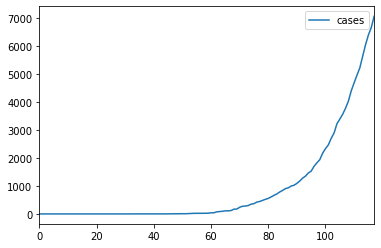

In [28]:
confirmed.plot()

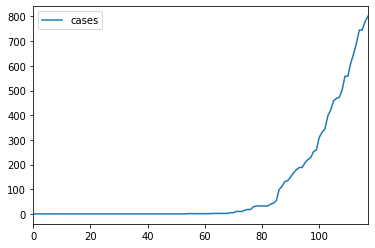

In [19]:
recovered.plot()

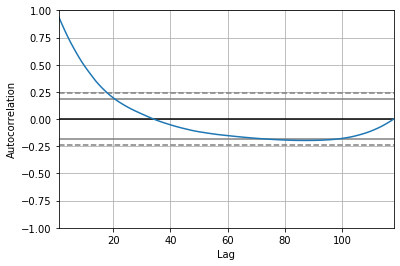

In [21]:
pd.plotting.autocorrelation_plot(confirmed['cases'])

In [23]:
confirmed['cases'].corr(confirmed['cases'].shift(20))

AttributeError: 'float' object has no attribute 'shape'